# They have it under control - South Korea story

## The end result: 

<img src="South Korea.png">

First we import the necessary packages

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

Using pandas package we import data. 

In [3]:
covid_19_data =  pd.read_csv('data/covid_19_data.csv')

In [13]:
covid_19_data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


We will be interested only in South Korea data, so let's filter them. 

In [11]:
south_korea_data = covid_19_data[covid_19_data['Country/Region']=='South Korea']

In [14]:
south_korea_data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
37,38,01/22/2020,NaN,South Korea,1/22/2020 17:00,1.0,0.0,0.0
75,76,01/23/2020,NaN,South Korea,1/23/20 17:00,1.0,0.0,0.0
121,122,01/24/2020,NaN,South Korea,1/24/20 17:00,2.0,0.0,0.0
162,163,01/25/2020,NaN,South Korea,1/25/20 17:00,2.0,0.0,0.0
208,209,01/26/2020,NaN,South Korea,1/26/20 16:00,3.0,0.0,0.0


I already know, that we don't have data for the Province/State in South Korea, so we have only one record per day. But if we have data from different Provinces we would need to group the data before we will work with them further. 

In [15]:
south_korea_data_groupped = south_korea_data.groupby(['ObservationDate','Country/Region']).agg({'Confirmed':sum,
                                                                'Deaths':sum,
                                                                'Recovered':sum})

In [16]:
south_korea_data_groupped.head()

,,Confirmed,Deaths,Recovered
ObservationDate,Country/Region,,,
01/22/2020,South Korea,1.0,0.0,0.0
01/23/2020,South Korea,1.0,0.0,0.0
01/24/2020,South Korea,2.0,0.0,0.0
01/25/2020,South Korea,2.0,0.0,0.0
01/26/2020,South Korea,3.0,0.0,0.0


In [22]:
south_korea_data_groupped = south_korea_data_groupped.reset_index()
south_korea_data_groupped.head()

,index,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,0,01/22/2020,South Korea,1.0,0.0,0.0
1,1,01/23/2020,South Korea,1.0,0.0,0.0
2,2,01/24/2020,South Korea,2.0,0.0,0.0
3,3,01/25/2020,South Korea,2.0,0.0,0.0
4,4,01/26/2020,South Korea,3.0,0.0,0.0


## Let's try with simple graph

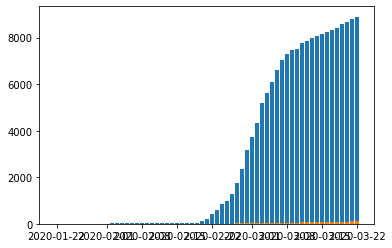

In [47]:
fig, ax1 = plt.subplots()
ax1.bar(south_korea_data_groupped['ObservationDate'], south_korea_data_groupped['Confirmed'])
ax1.bar(south_korea_data_groupped['ObservationDate'], south_korea_data_groupped['Deaths'])
plt.show()

We see that few things went wrong. First of all the x axis. 

In [37]:
import datetime
south_korea_data_groupped['ObservationDate'] = south_korea_data_groupped['ObservationDate'].apply(lambda row: datetime.datetime.strptime(row,"%m/%d/%Y").date())

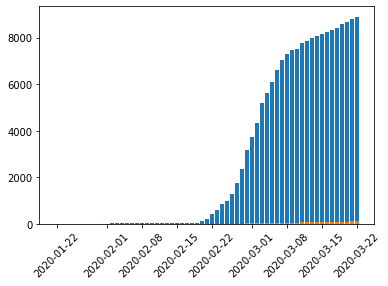

In [48]:
import matplotlib.dates as mdates
fig, ax1 = plt.subplots()
formatter = mdates.DateFormatter("%Y-%m-%d")
ax1.xaxis.set_major_formatter(formatter)   
dates_list = list(south_korea_data_groupped['ObservationDate'].unique())
ax1.bar(dates_list, south_korea_data_groupped['Confirmed'])
ax1.bar(dates_list, south_korea_data_groupped['Deaths'])
ax1.tick_params(axis='y')
plt.xticks(rotation=45)
plt.show()

Now, let's add the title and X-axis and Y-axis names and legend. 

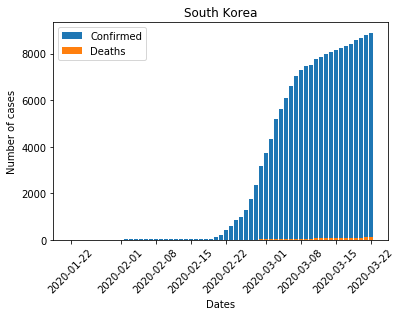

In [50]:
fig, ax1 = plt.subplots()
ax1.set(xlabel='Dates', ylabel='Number of cases', title='South Korea')
formatter = mdates.DateFormatter("%Y-%m-%d")
ax1.xaxis.set_major_formatter(formatter)   
dates_list = list(south_korea_data_groupped['ObservationDate'].unique())
ax1.bar(dates_list, south_korea_data_groupped['Confirmed'], label='Confirmed')
ax1.bar(dates_list, south_korea_data_groupped['Deaths'], label='Deaths')
ax1.tick_params(axis='y')
plt.xticks(rotation=45)
plt.legend()
plt.show()

Let's now add two lines, which are showing the proporcion of deaths to all confirmed cases, or deaths to death + recovered

Death_rate_1 = $\frac{deaths}{confirmed}$

Death_rate_2 = $\frac{deaths}{deaths + recovered}$

To do it we need function $shift$ which let us to take values for the one day before. I use it together with the groupby, but as we have only one country we could use simple shift function. 

In [44]:
skdg = south_korea_data_groupped

In [45]:
#skdg['Deaths_yesterday'] = skdg.groupby(['Country/Region'])['Deaths'].shift(1)
skdg['Deaths_yesterday'] = skdg['Deaths'].shift(1)
skdg['Deaths_per_day'] = skdg['Deaths']- skdg['Deaths_yesterday']
#skdg['Confirmed_yesterday'] = skdg.groupby(['Country/Region'])['Confirmed'].shift(1)
skdg['Confirmed_yesterday'] = skdg['Confirmed'].shift(1)
skdg['Confirmed_per_day'] = skdg['Confirmed']- skdg['Confirmed_yesterday']
skdg['Death_rate']=skdg['Deaths']/skdg['Confirmed']
skdg['Death_rate_ended']=skdg['Deaths']/(skdg['Deaths']+skdg['Recovered'])

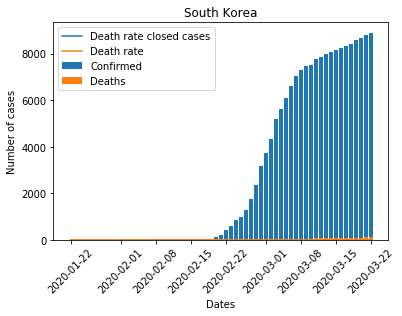

In [56]:
fig, ax1 = plt.subplots()
ax1.set(xlabel='Dates', ylabel='Number of cases', title='South Korea')
formatter = mdates.DateFormatter("%Y-%m-%d")
ax1.xaxis.set_major_formatter(formatter)   
dates_list = list(skdg['ObservationDate'].unique())
ax1.bar(dates_list, skdg['Confirmed'], label='Confirmed')
ax1.bar(dates_list, skdg['Deaths'], label='Deaths')
ax1.plot(dates_list , skdg['Death_rate_ended'], label = 'Death rate closed cases')
ax1.plot(dates_list , skdg['Death_rate'], label = 'Death rate')
ax1.tick_params(axis='y')
plt.xticks(rotation=45)
plt.legend()
plt.show()

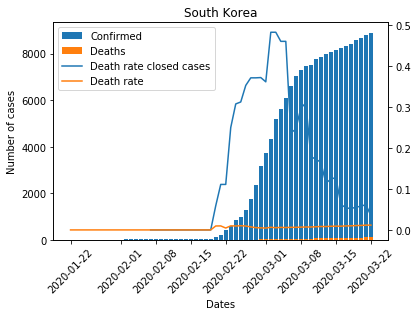

In [75]:
fig, ax1 = plt.subplots()
ax1.set(xlabel='Dates', ylabel='Number of cases', title='South Korea')
formatter = mdates.DateFormatter("%Y-%m-%d")
ax1.xaxis.set_major_formatter(formatter)
plt.xticks(rotation=45)
ax2 = ax1.twinx() 
dates_list = list(skdg['ObservationDate'].unique())
b1 = ax1.bar(dates_list, skdg['Confirmed'], label='Confirmed')
b2 = ax1.bar(dates_list, skdg['Deaths'], label='Deaths')
l1 = ax2.plot(dates_list , skdg['Death_rate_ended'], label = 'Death rate closed cases')
l2 = ax2.plot(dates_list , skdg['Death_rate'], label = 'Death rate')
ax1.tick_params(axis='y')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2)
plt.show()

We see that it used the same colors for the lines and bars. We can fix it by manually setting colors or by importing some smart pallete. 
[https://docs.bokeh.org/en/latest/docs/reference/palettes.html](https://docs.bokeh.org/en/latest/docs/reference/palettes.html) 

In [78]:
from bokeh import palettes as bh

In [99]:
colors_bars = bh.viridis(4)
colors_lines = bh.inferno(4)
colors

['#000003', '#410967', '#932567', '#DC5039', '#FBA40A', '#FCFEA4']

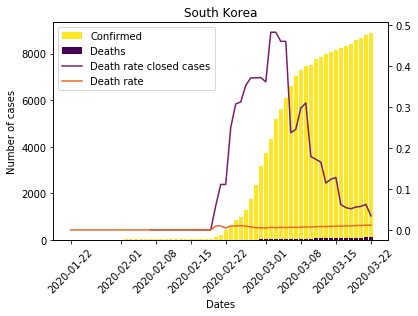

In [105]:
fig, ax1 = plt.subplots()
ax1.set(xlabel='Dates', ylabel='Number of cases', title='South Korea')
formatter = mdates.DateFormatter("%Y-%m-%d")
ax1.xaxis.set_major_formatter(formatter)
plt.xticks(rotation=45)
ax2 = ax1.twinx() 
dates_list = list(skdg['ObservationDate'].unique())
b1 = ax1.bar(dates_list, skdg['Confirmed'], label='Confirmed', color = colors_bars[3])
b2 = ax1.bar(dates_list, skdg['Deaths'], label='Deaths', color = colors_bars[0])
l1 = ax2.plot(dates_list , skdg['Death_rate_ended'], label = 'Death rate closed cases', color = colors_lines[1])
l2 = ax2.plot(dates_list , skdg['Death_rate'], label = 'Death rate', color = colors_lines[2])
ax1.tick_params(axis='y')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2)
plt.show()

https://matplotlib.org/3.1.0/gallery/style_sheets/style_sheets_reference.html

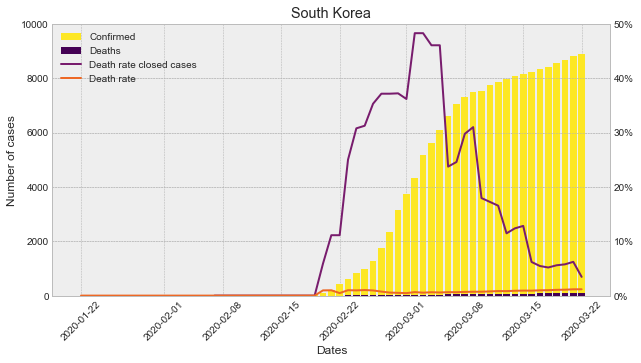

In [115]:
import matplotlib.ticker as mtick
plt.style.use('bmh')
fig, ax1 = plt.subplots(figsize=(10,5))
ax1.set(xlabel='Dates', ylabel='Number of cases', title='South Korea')

formatter = mdates.DateFormatter("%Y-%m-%d")
ax1.xaxis.set_major_formatter(formatter)
plt.xticks(rotation=45)
ax2 = ax1.twinx() 
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1))
dates_list = list(skdg['ObservationDate'].unique())
b1 = ax1.bar(dates_list, skdg['Confirmed'], label='Confirmed', color = colors_bars[3])
b2 = ax1.bar(dates_list, skdg['Deaths'], label='Deaths', color = colors_bars[0])
l1 = ax2.plot(dates_list , skdg['Death_rate_ended'], label = 'Death rate closed cases', color = colors_lines[1])
l2 = ax2.plot(dates_list , skdg['Death_rate'], label = 'Death rate', color = colors_lines[2])
ax1.tick_params(axis='y')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2,loc=2)
ax1.set_ylim(0,10000)
ax2.set_ylim(0,0.5)
plt.show()

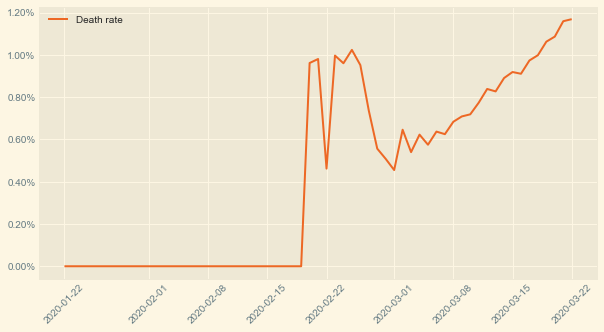

In [120]:
import matplotlib.ticker as mtick
plt.style.use('Solarize_Light2')
fig, ax2 = plt.subplots(figsize=(10,5))
ax1.set(xlabel='Dates', ylabel='Death rate', title='South Korea')
plt.xticks(rotation=45)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1))
dates_list = list(skdg['ObservationDate'].unique())
ax2.plot(dates_list , skdg['Death_rate'], label = 'Death rate', color = colors_lines[2])
ax2.legend()
plt.show()